<a href="https://colab.research.google.com/github/NataliaCFreitas/Exerc-cios-Garcia/blob/main/Breast_Cancer_Coimbra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast Cancer Coimbra

###Instalação/importação do **dataset**

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_coimbra = fetch_ucirepo(id=451)

# data (as pandas dataframes)
X = breast_cancer_coimbra.data.features
y = breast_cancer_coimbra.data.targets

# metadata
print(breast_cancer_coimbra.metadata)

# variable information
print(breast_cancer_coimbra.variables)


{'uci_id': 451, 'name': 'Breast Cancer Coimbra', 'repository_url': 'https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra', 'data_url': 'https://archive.ics.uci.edu/static/public/451/data.csv', 'abstract': 'Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 116, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': ['Age'], 'target_col': ['Classification'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C52P59', 'creators': ['Miguel Patrcio', 'Jos Pereira', 'Joana Crisstomo', 'Paulo Matafome', 'Raquel Seia', 'Francisco Caramelo'], 'intro_paper': {'title': 'Using Resistin, glucose, age and BMI to predict the presence of breast cancer', 'authors': 'M. Patrício, J. Pereira, J. Cri

###Plotagem dos dados originais do dataset

In [3]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [4]:
y

,Classification
0,1
1,1
2,1
3,1
4,1
...,...
111,2
112,2
113,2
114,2


###Importações das bibliotecas

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import pandas as pd

###Gráfico de correlação

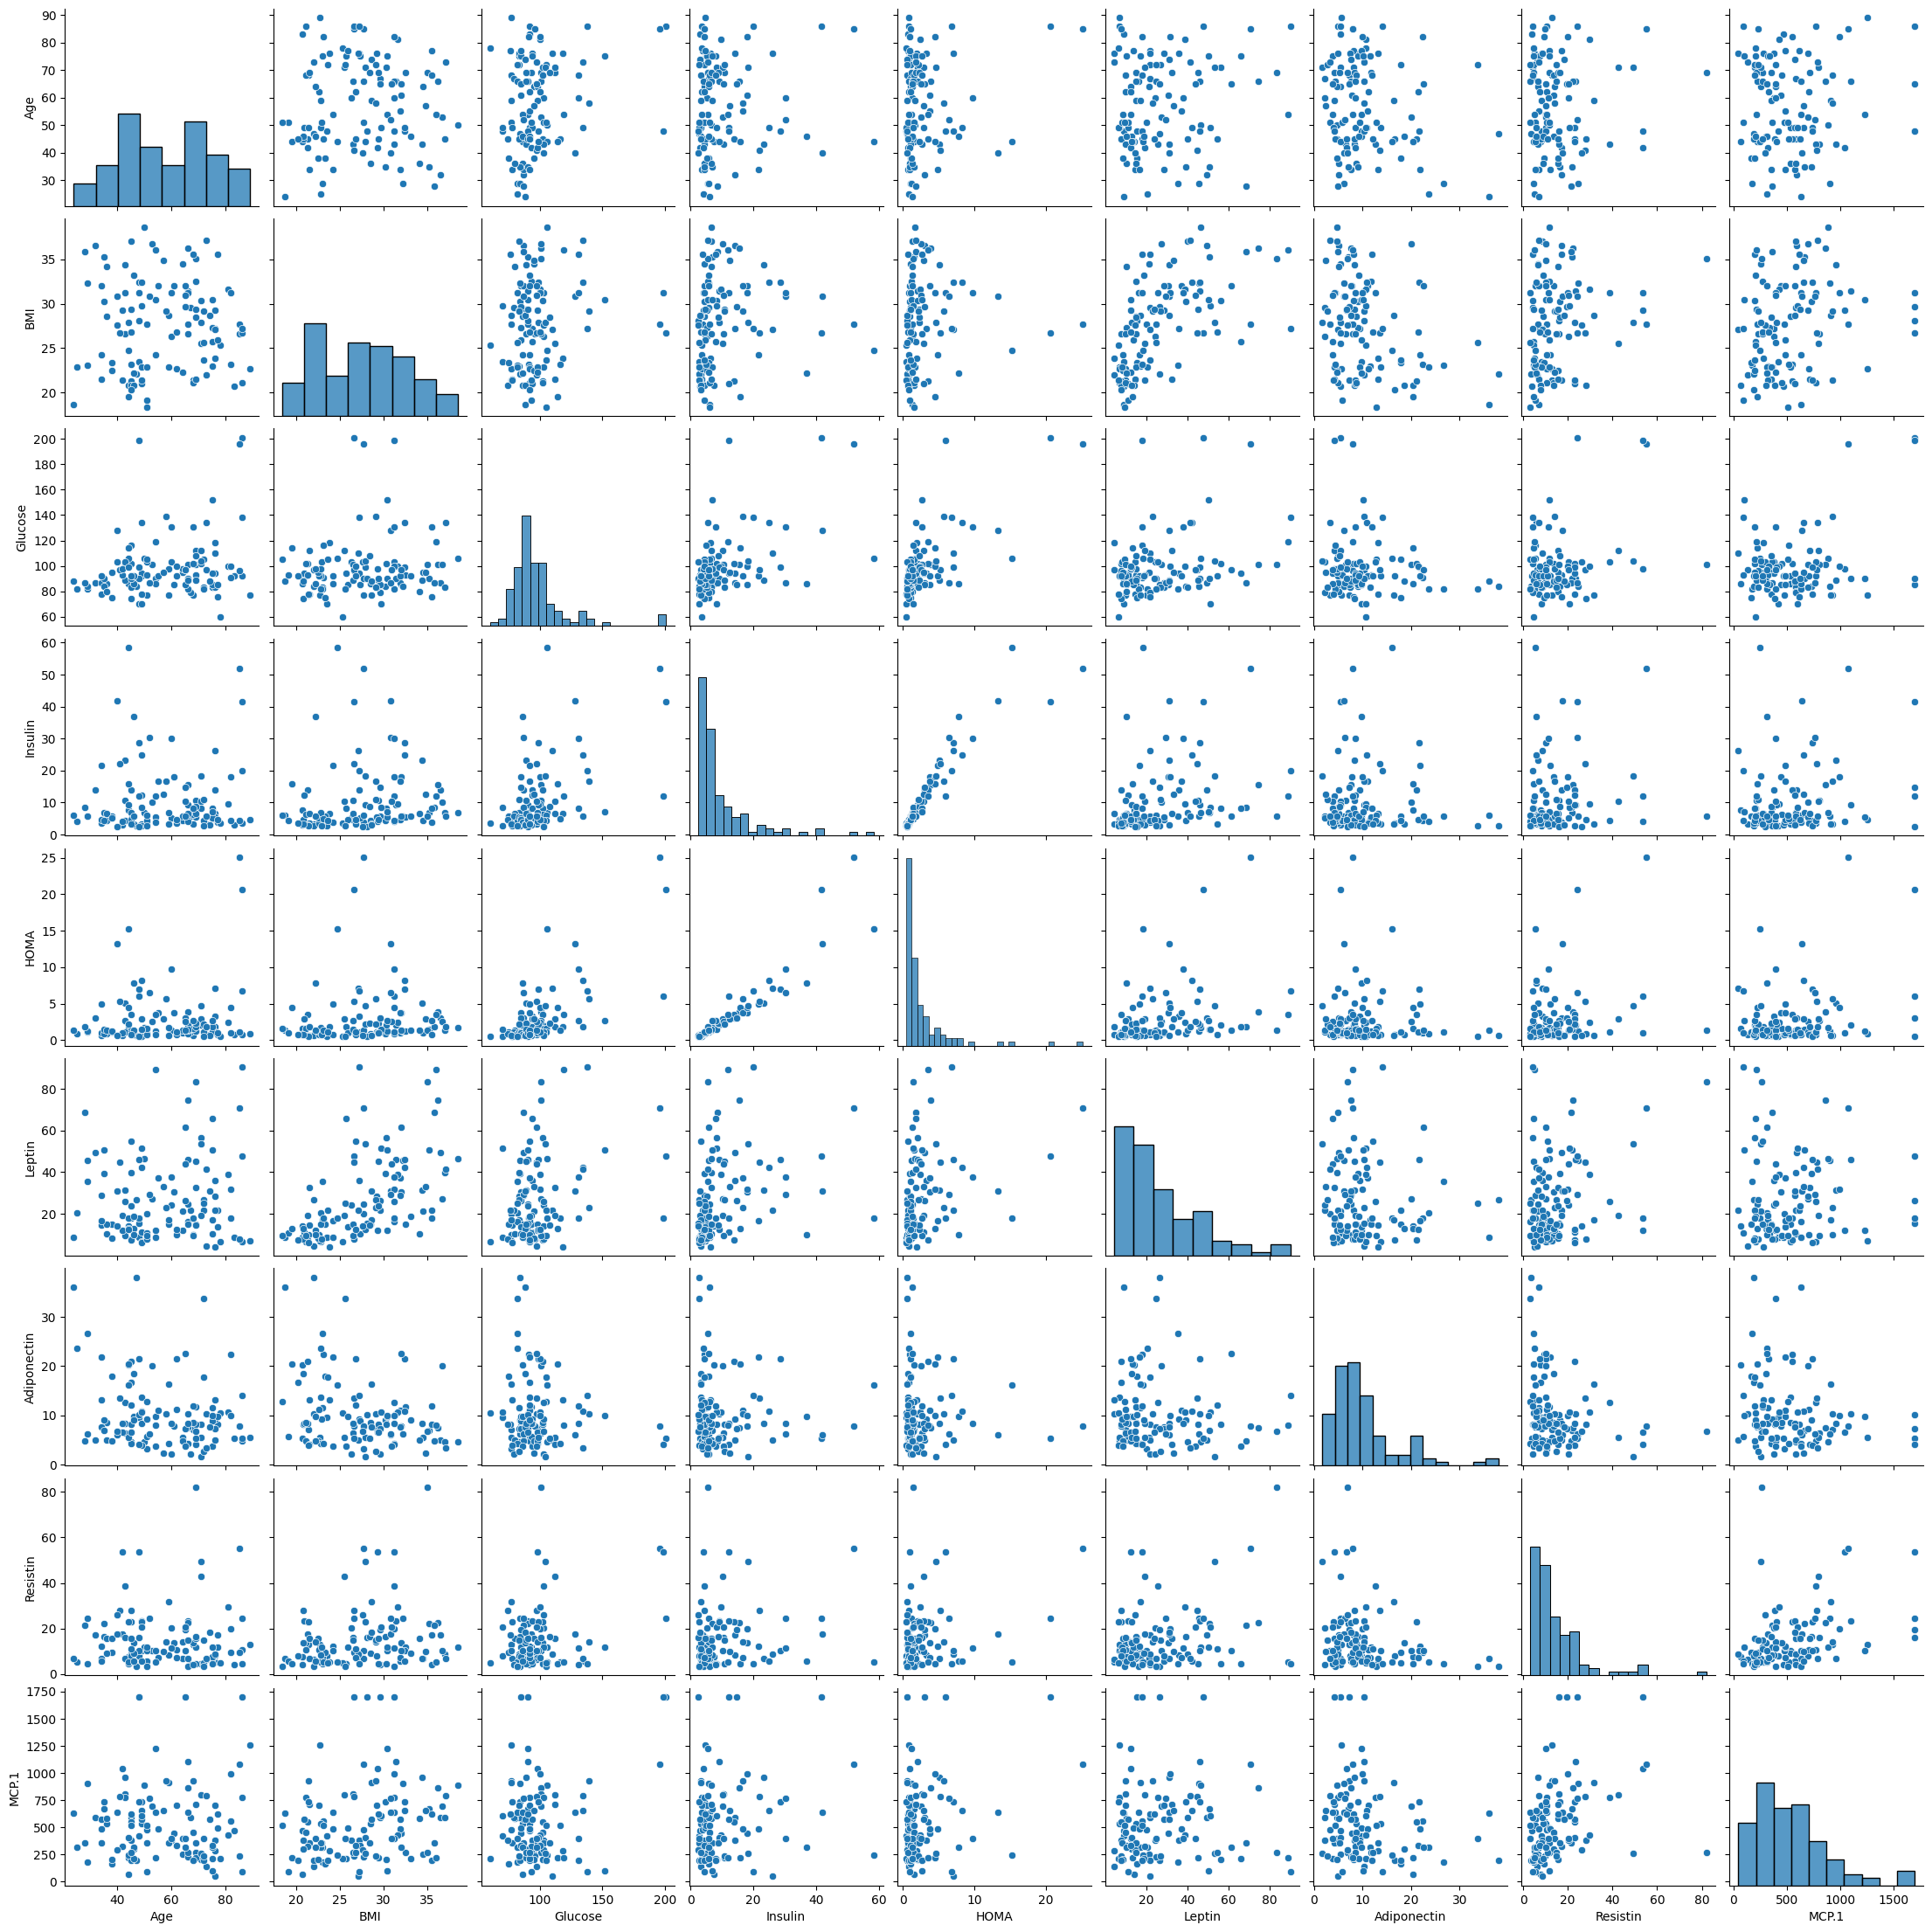

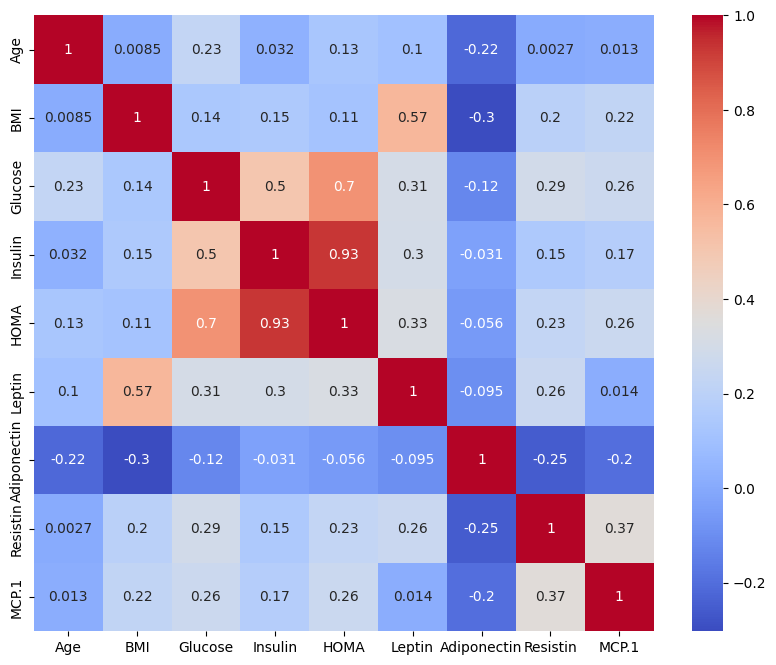

In [6]:

sns.pairplot(X)
plt.show()

corr_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

###Separando os dados em teste e treino

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
9,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302
33,34.422174,89,23.194,5.091856,31.2128,8.300955,6.71026,960.246
64,22.832879,98,6.862,1.658774,14.9037,4.230105,8.20490,355.310
66,24.218750,86,3.730,0.791257,8.6874,3.705230,10.34455,635.049
28,35.250761,90,6.817,1.513374,50.6094,6.966895,22.03703,667.928
...,...,...,...,...,...,...,...,...
106,29.384757,90,4.713,1.046286,23.8479,6.644245,15.55625,621.273
14,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020
92,30.801249,87,30.212,6.483495,29.2739,6.268540,24.24591,764.667
51,25.900000,85,4.580,0.960273,13.7400,9.753260,11.77400,488.829


###Separação das melhores colunas e as que fazem mais peso/mais correlação

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [16]:
feature_importances = model.feature_importances_

In [17]:
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [18]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

In [19]:
ranking_features = feature_importances_df.head(10)['Feature'].tolist()

In [21]:
features_df = X[ranking_features]
features_df

,Glucose,Resistin,BMI,Insulin,HOMA,Leptin,Adiponectin,MCP.1
0,70,7.99585,23.500000,2.707,0.467409,8.8071,9.702400,417.114
1,92,4.06405,20.690495,3.115,0.706897,8.8438,5.429285,468.786
2,91,9.27715,23.124670,4.498,1.009651,17.9393,22.432040,554.697
3,77,12.76600,21.367521,3.226,0.612725,9.8827,7.169560,928.220
4,92,10.57635,21.111111,3.549,0.805386,6.6994,4.819240,773.920
...,...,...,...,...,...,...,...,...
111,92,10.96000,26.850000,3.330,0.755688,54.6800,12.100000,268.230
112,100,7.32000,26.840000,4.530,1.117400,12.4500,21.420000,330.160
113,97,10.33000,32.050000,5.730,1.370998,61.4800,22.540000,314.050
114,82,3.27000,25.590000,2.820,0.570392,24.9600,33.750000,392.460


###Gráfico de correlação entre as colunas selecionadas

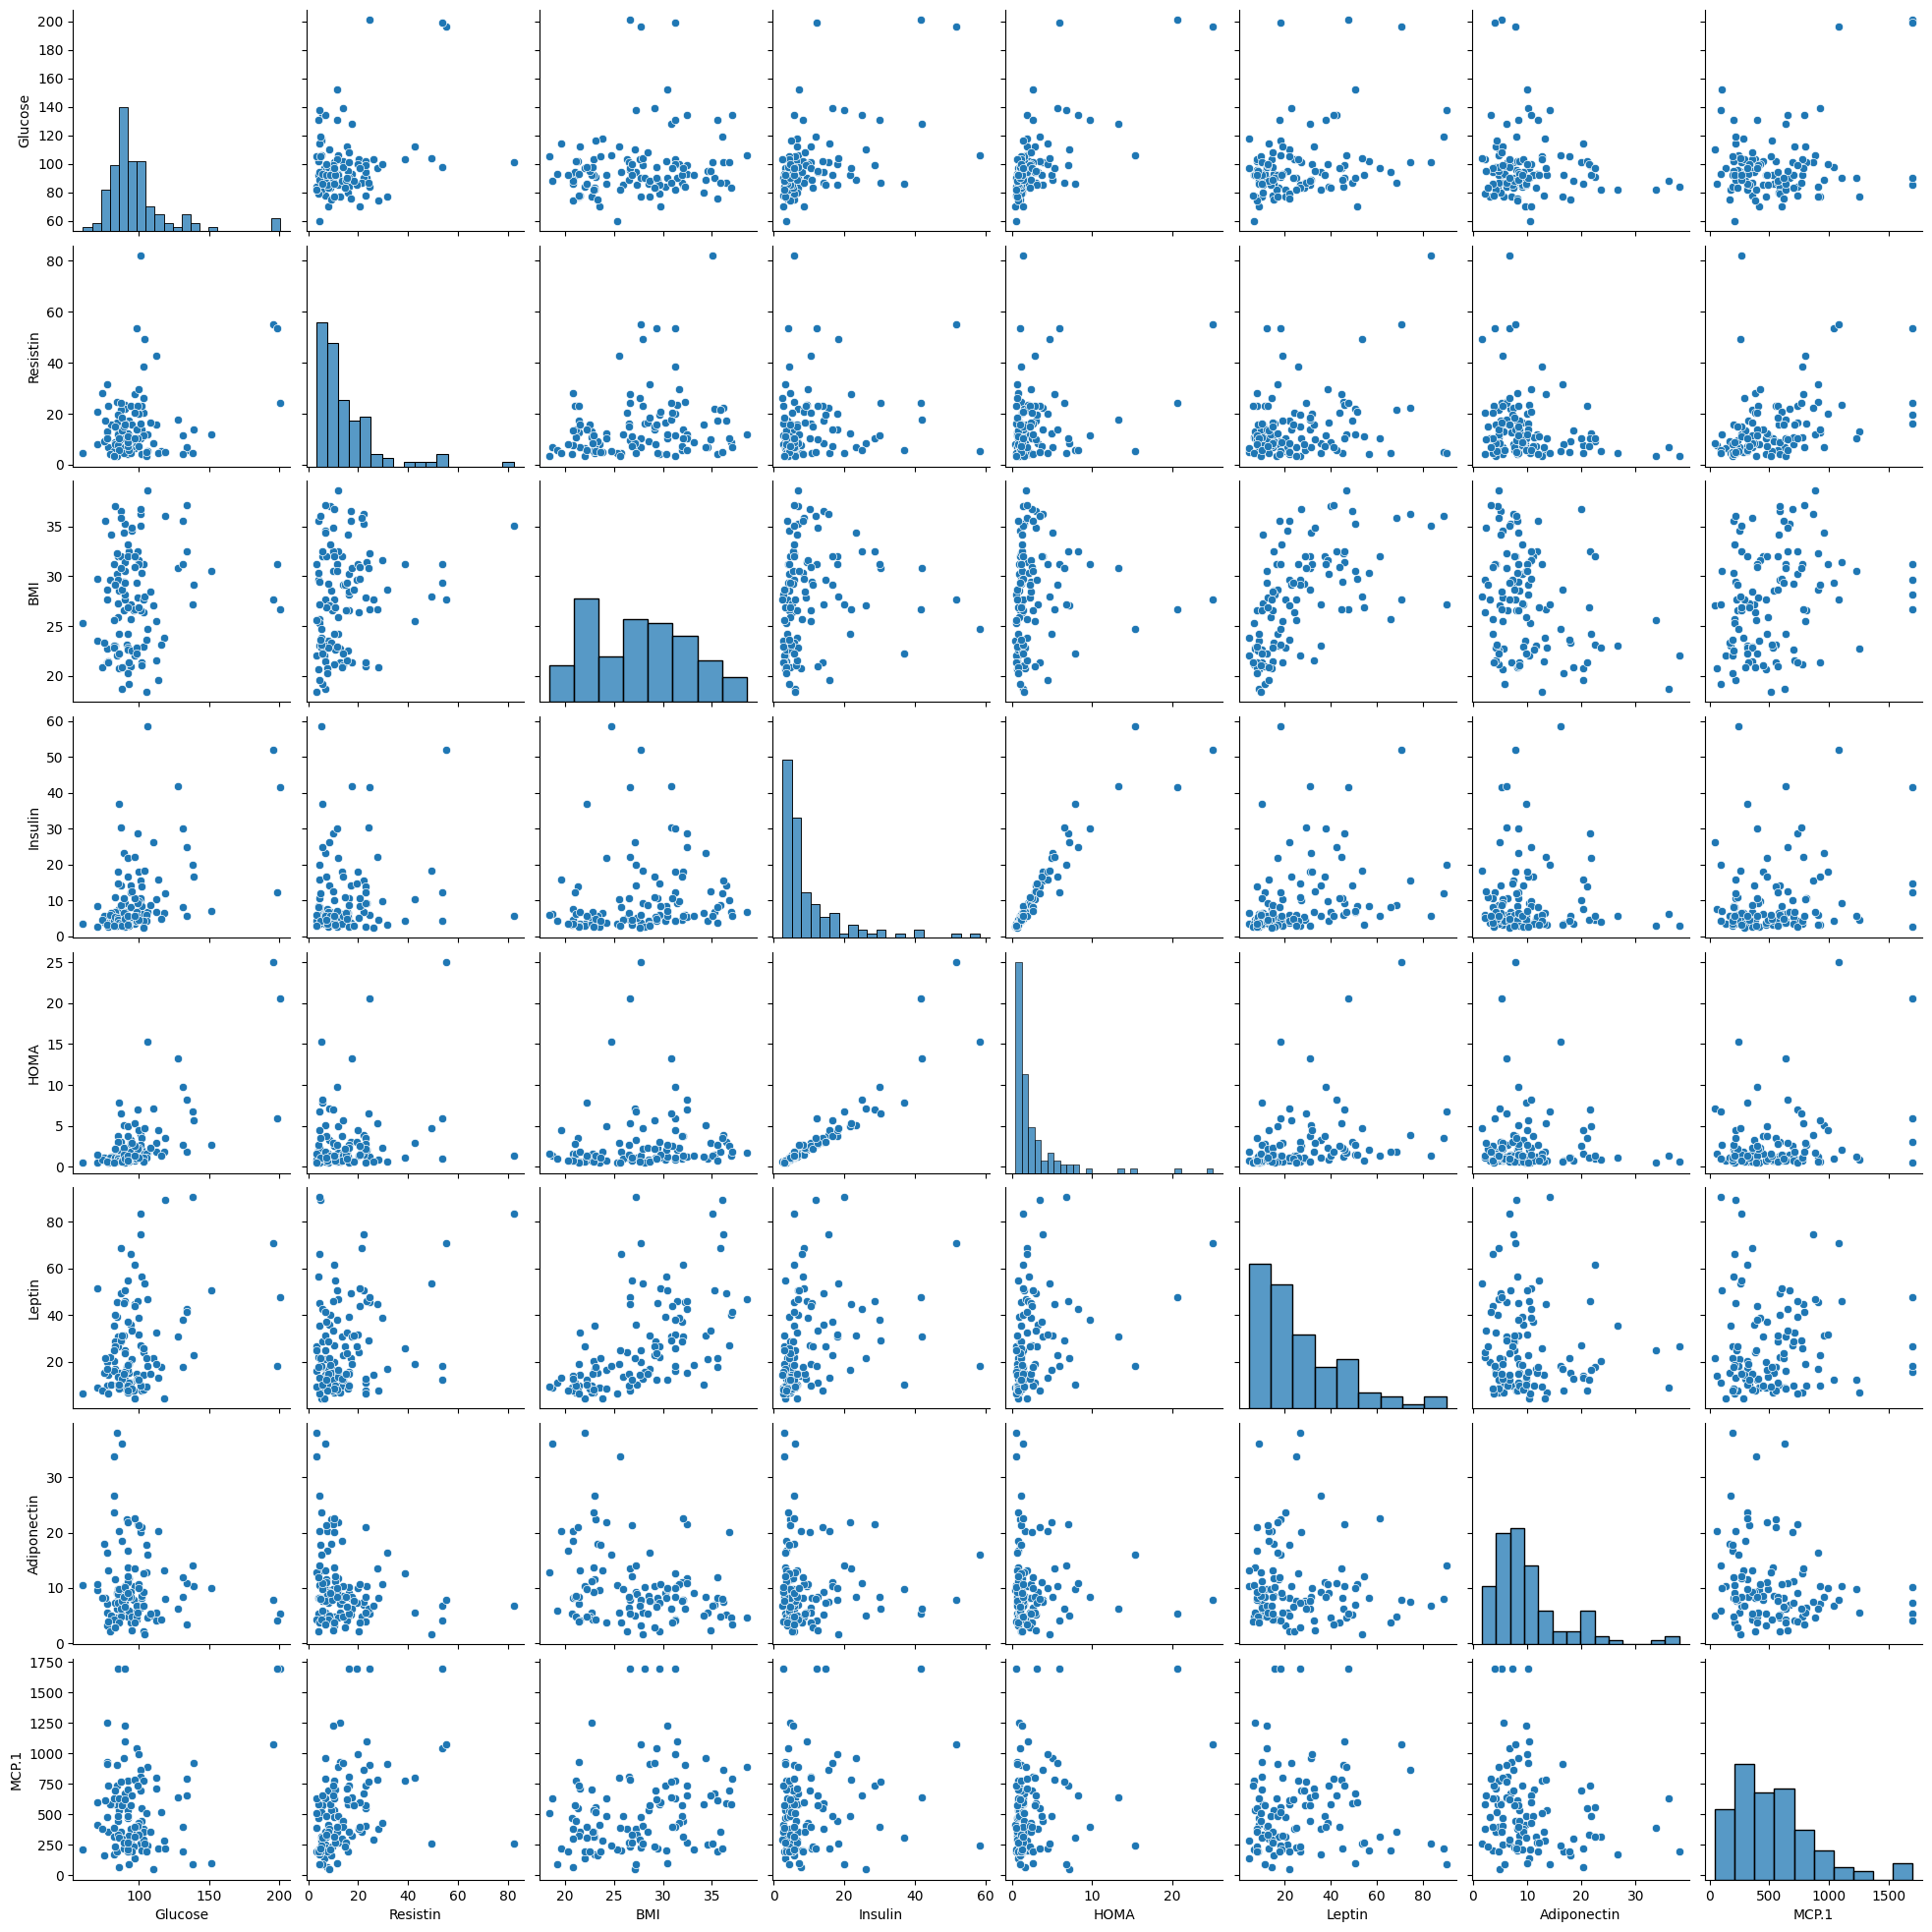

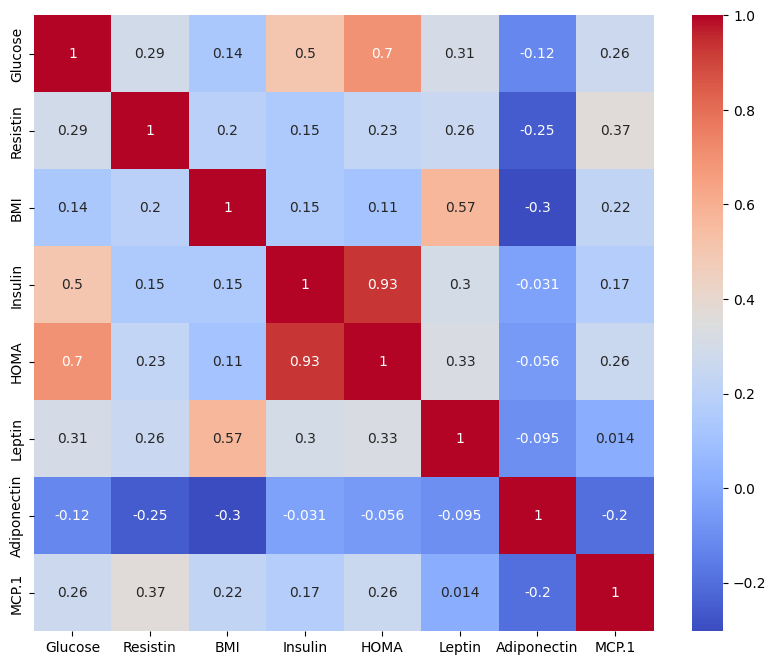

In [22]:
sns.pairplot(features_df)
plt.show()

corr_matrix_filter_columns = features_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_filter_columns, annot=True, cmap='coolwarm')
plt.show()

###Separando os dados das melhores colunas do dataset original em teste e treino


In [23]:
from sklearn.model_selection import train_test_split

X_train_f_c, X_test_f_c, Y_train_f_c, Y_test_f_c = train_test_split(features_df, y, test_size=0.3, random_state=42)

X_train_f_c

,Glucose,Resistin,BMI,Insulin,HOMA,Leptin,Adiponectin,MCP.1
9,83,7.09130,23.000000,4.952,1.013839,17.1270,11.578990,318.302
33,89,6.71026,34.422174,23.194,5.091856,31.2128,8.300955,960.246
64,98,8.20490,22.832879,6.862,1.658774,14.9037,4.230105,355.310
66,86,10.34455,24.218750,3.730,0.791257,8.6874,3.705230,635.049
28,90,22.03703,35.250761,6.817,1.513374,50.6094,6.966895,667.928
...,...,...,...,...,...,...,...,...
106,90,15.55625,29.384757,4.713,1.046286,23.8479,6.644245,621.273
14,75,9.35000,23.340000,5.782,1.069670,15.2600,17.950000,165.020
92,87,24.24591,30.801249,30.212,6.483495,29.2739,6.268540,764.667
51,85,11.77400,25.900000,4.580,0.960273,13.7400,9.753260,488.829


In [24]:
colunas = X_train_f_c.columns.tolist()
colunas2 = X_train.columns.tolist()
print(colunas)

['Glucose', 'Resistin', 'BMI', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'MCP.1']


In [30]:
X_gl = X_train_f_c["Glucose"].values
X_re = X_train_f_c["Resistin"].values
X_bmi = X_train_f_c["BMI"].values
X_ins = X_train_f_c["Insulin"].values
X_hom = X_train_f_c["HOMA"].values
X_le = X_train_f_c["Leptin"].values
X_ad = X_train_f_c["Adiponectin"].values
X_mc = X_train_f_c["MCP.1"].values

In [32]:
y_train["Classification"]

9      1
33     1
64     2
66     2
28     1
      ..
106    2
14     1
92     2
51     1
102    2
Name: Classification, Length: 81, dtype: int64

###Inicio dos modelos

In [38]:
# Modelo 1
with pm.Model() as model_all:
  alpha = pm.Normal("alpha",0,1)
  betas = pm.Normal("betas",0,1, shape=8)

  eps = pm.HalfNormal("eps",1)

  mu = alpha + pm.math.dot(betas, X_train.values.T)

  likelihood = pm.Normal("y_obs",mu,eps,observed=y_train["Classification"].values)

###Calculo da Priori sem dados

In [41]:
with model_all:
  trace_model_allp = pm.sample_prior_predictive()

###Plotagem dos dados

array([<Axes: xlabel='y_obs / y_obs'>], dtype=object)

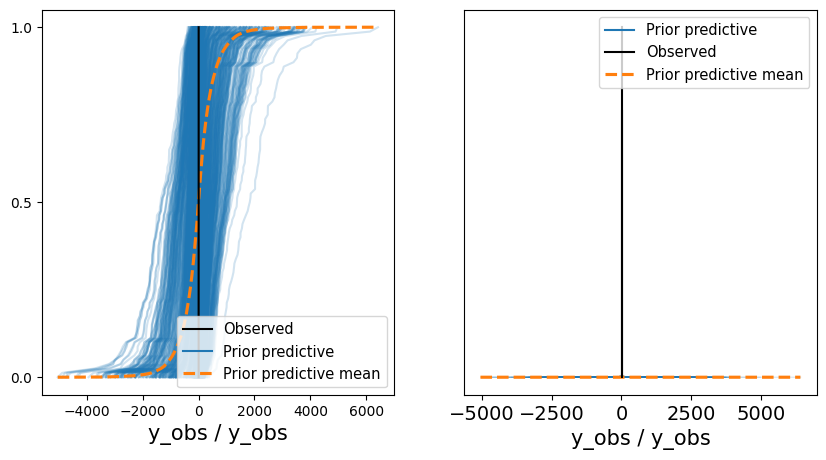

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_allp, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_model_allp, group='prior',ax=axes[1])

In [45]:
with model_all:
  trace_model_all = pm.sample()

pm.summary(trace_model_all)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.142,0.508,-1.076,0.805,0.017,0.012,914.0,1055.0,1.0
betas[0],-0.017,0.012,-0.041,0.007,0.000,0.000,1055.0,1196.0,1.0
betas[1],0.021,0.004,0.012,0.029,0.000,0.000,805.0,1095.0,1.0
betas[2],0.061,0.017,0.031,0.094,0.001,0.000,791.0,1128.0,1.0
betas[3],-0.204,0.059,-0.315,-0.093,0.002,0.002,692.0,989.0,1.0
betas[4],-0.002,0.003,-0.009,0.004,0.000,0.000,1167.0,1303.0,1.0
betas[5],-0.003,0.008,-0.018,0.011,0.000,0.000,1515.0,1442.0,1.0
betas[6],0.007,0.005,-0.002,0.016,0.000,0.000,1444.0,1416.0,1.0
betas[7],0.000,0.000,-0.000,0.001,0.000,0.000,1430.0,1260.0,1.0
eps,0.446,0.039,0.375,0.518,0.001,0.001,1268.0,1248.0,1.0


In [46]:
with model_all:
  trace_model_all_post = pm.sample_posterior_predictive(trace_model_all)

In [61]:
#Modelo 2
with pm.Model() as model_filter:
  alpha = pm.Normal("alpha",0,1)
  betas = pm.Normal("betas",0,1, shape=8)

  eps = pm.HalfNormal("eps",1)

  mu = alpha + pm.math.dot(betas, X_train_f_c.values.T)
  likelihood = pm.Normal("y_obs",mu,eps,observed=y_train["Classification"].values)

In [62]:
with model_filter:
  trace_model_filter_priori = pm.sample_prior_predictive()

array([<Axes: xlabel='y_obs / y_obs'>], dtype=object)

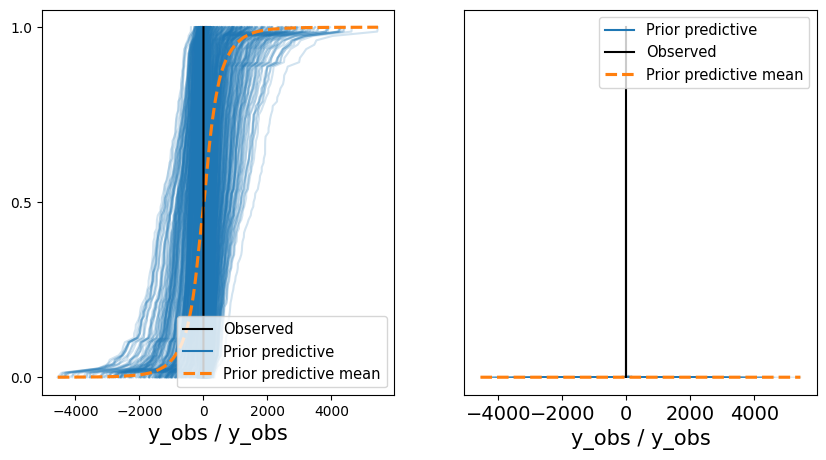

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_model_filter_priori, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_model_filter_priori, group='prior',ax=axes[1])

In [64]:
with model_filter:
  trace_model_filter = pm.sample()

pm.summary(trace_model_filter)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.167,0.508,-1.021,0.903,0.018,0.013,771.0,1088.0,1.00
betas[0],0.021,0.004,0.013,0.029,0.000,0.000,895.0,1131.0,1.00
betas[1],0.007,0.005,-0.002,0.016,0.000,0.000,1484.0,1411.0,1.00
betas[2],-0.017,0.012,-0.040,0.006,0.000,0.000,1110.0,1191.0,1.00
betas[3],0.061,0.017,0.029,0.093,0.001,0.000,876.0,1031.0,1.00
betas[4],-0.205,0.058,-0.322,-0.102,0.002,0.001,775.0,1040.0,1.00
betas[5],-0.002,0.003,-0.009,0.004,0.000,0.000,1354.0,1161.0,1.00
betas[6],-0.002,0.008,-0.016,0.012,0.000,0.000,1656.0,1387.0,1.00
betas[7],0.000,0.000,-0.000,0.000,0.000,0.000,1491.0,1223.0,1.00
eps,0.444,0.038,0.376,0.518,0.001,0.001,1480.0,1194.0,1.01
